../Data/sensorA.mat
acetone
Split
RandomFlag
False


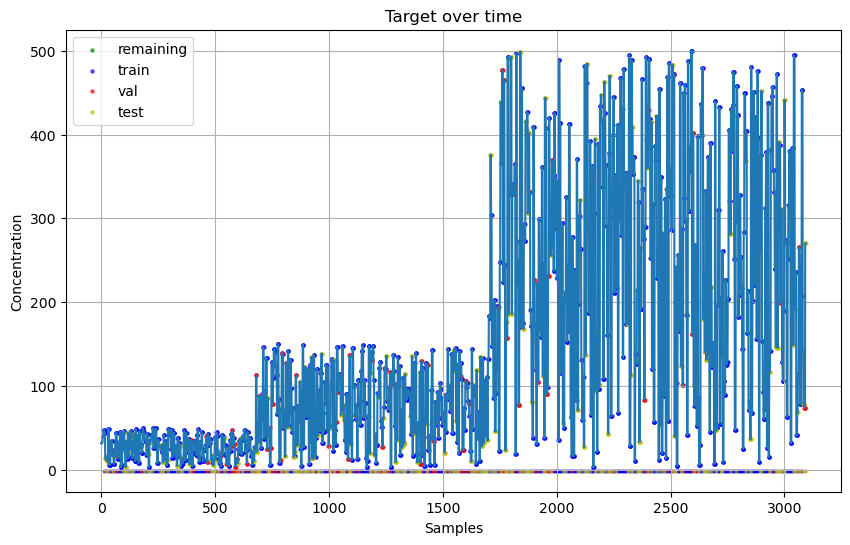

Root Mean Squared Error (RMSE): 16.750622378841165
Root Mean Squared Error (RMSE): 18.60234454243179
../Data/sensorA.mat
acetone
Split
RandomFlag
False


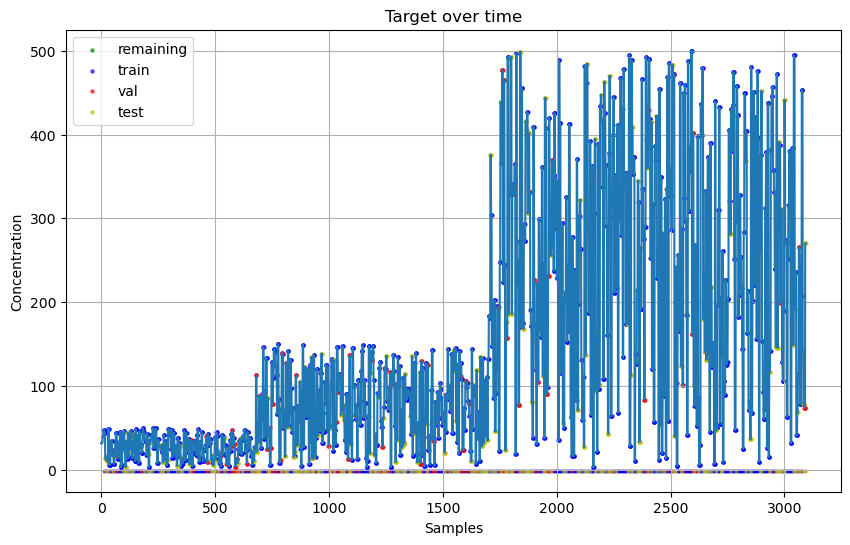

Root Mean Squared Error (RMSE): 15.364806526713133
Root Mean Squared Error (RMSE): 18.331335962540827
../Data/sensorA.mat
acetone
Split
RandomFlag
False


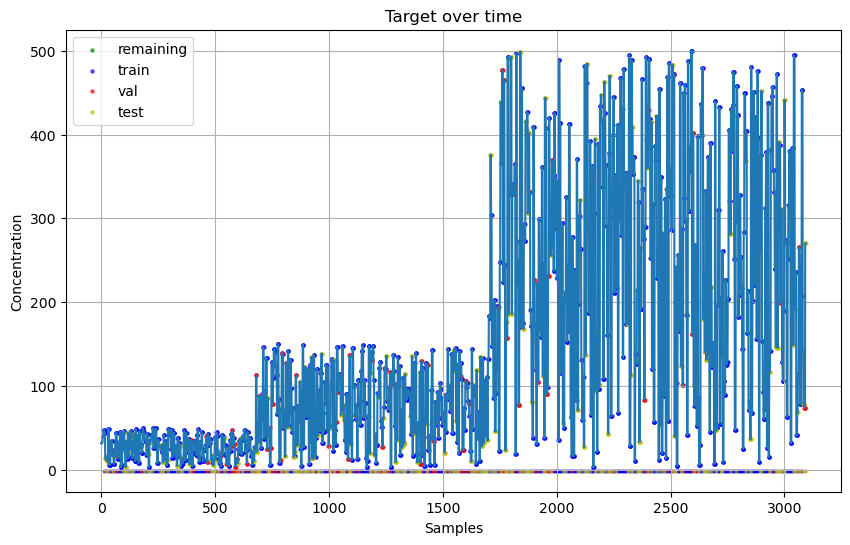

Root Mean Squared Error (RMSE): 17.007747708044292
Root Mean Squared Error (RMSE): 19.81328684282702
../Data/sensorA.mat
acetone
Split
RandomFlag
False


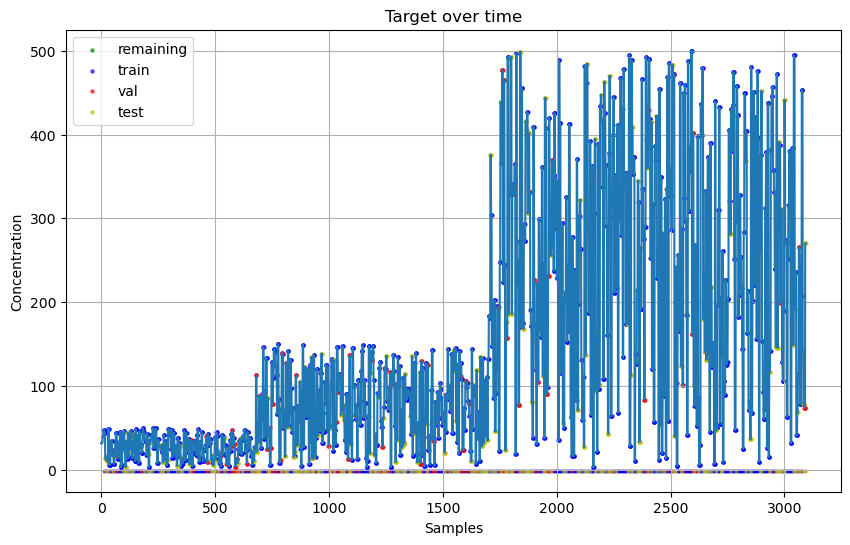

Root Mean Squared Error (RMSE): 14.855362469560042
Root Mean Squared Error (RMSE): 17.01695808507577
../Data/sensorA.mat
acetone
Split
RandomFlag
False


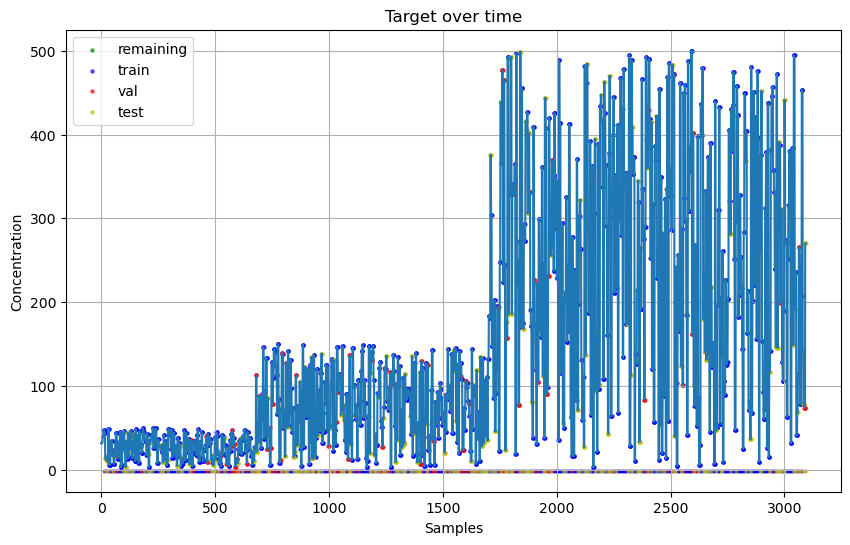

Root Mean Squared Error (RMSE): 14.879698817201323
Root Mean Squared Error (RMSE): 17.89535679197869
../Data/sensorA.mat
acetone
Split
RandomFlag
False


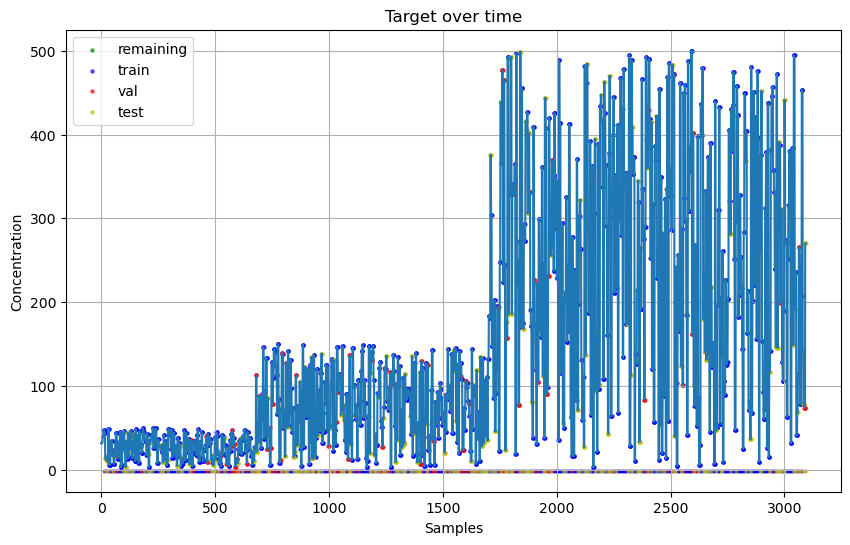

Root Mean Squared Error (RMSE): 15.285220144249628
Root Mean Squared Error (RMSE): 17.999320560771796
../Data/sensorA.mat
acetone
Split
RandomFlag
False


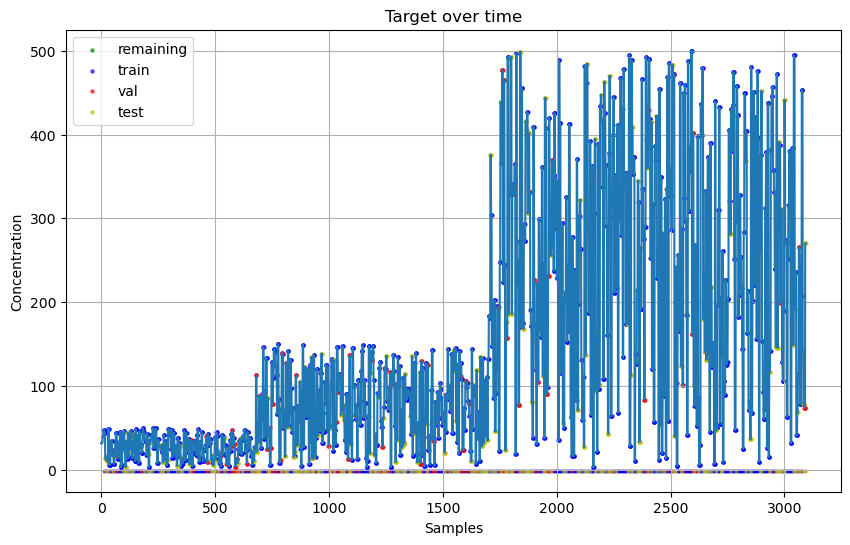

Root Mean Squared Error (RMSE): 16.304343539947368
Root Mean Squared Error (RMSE): 18.065820728797803
../Data/sensorA.mat
acetone
Split
RandomFlag
False


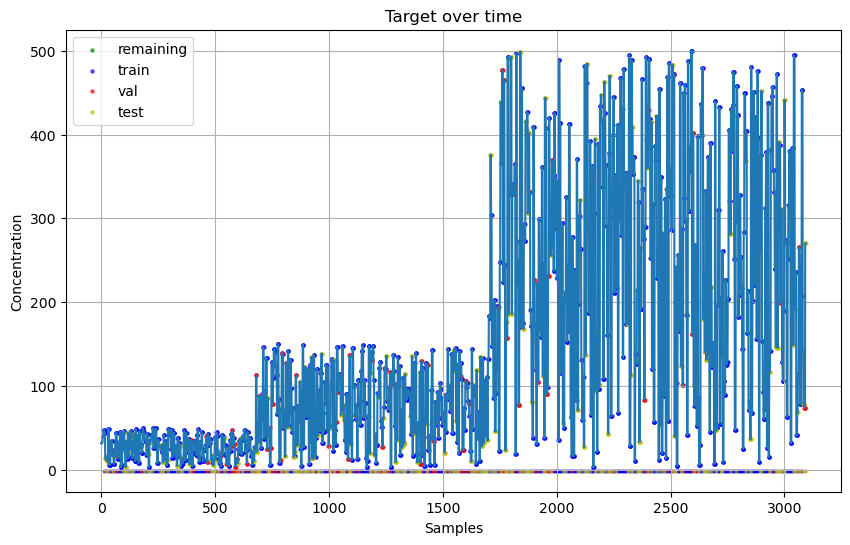

Root Mean Squared Error (RMSE): 15.01228243561409
Root Mean Squared Error (RMSE): 17.41763255084364
../Data/sensorA.mat
acetone
Split
RandomFlag
False


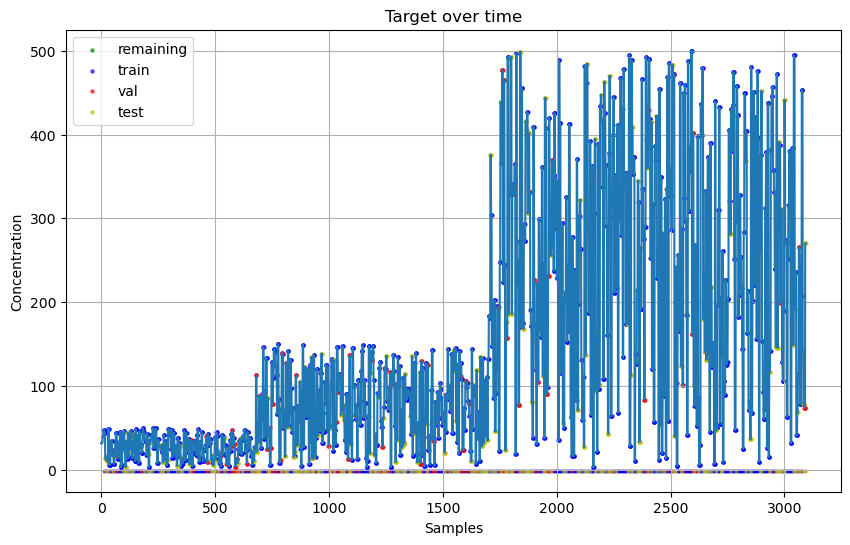

Root Mean Squared Error (RMSE): 15.455140656442682
Root Mean Squared Error (RMSE): 17.04982461144175
../Data/sensorA.mat
acetone
Split
RandomFlag
False


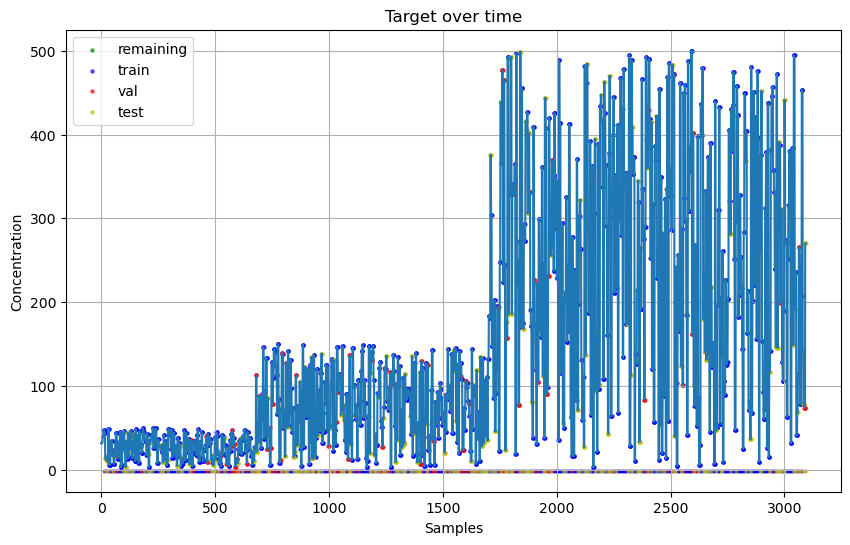

Root Mean Squared Error (RMSE): 15.893462918789213
Root Mean Squared Error (RMSE): 18.1818119943893
mean RMSE: 18.03736926710984


In [1]:
rmseAll = []
for lv in range(10):
    from pathlib import Path
    import sys
    import matplotlib.pyplot as plt
    import numpy as np
    import json
    from sklearn.metrics import mean_squared_error

    # Add the path to the folder containing the script
    script_path = Path('../PreProcessing').resolve()
    sys.path.insert(0, str(script_path))
    import loadDataFull

    script_path = Path('../Networks').resolve()
    sys.path.insert(0, str(script_path))
    from TCOCNN import TCOCNNClass

    # DataLocation
    locationData = "../Data/"

    loadStruct = {}
    # Struct DataLocation
    loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat"]
    loadStruct["fileNameTargetAll"] = [locationData + "targets.mat"]

    # Struct DataLocation
    #loadStruct["fileNameDataAll"] = [locationData + "sensorA.mat",locationData + "sensorA.mat"]
    #loadStruct["fileNameTargetAll"] = [locationData + "targets.mat",locationData + "targets.mat"]
    loadStruct["targetGas"] = 'acetone'

    # Used Method %see LoadDataFull 1: 70% 10% 20% Split
    loadStruct["loadMethod"] = 1

    # Expected Input Dimensions
    loadStruct["dataSize"] = [4, 1440]

    # Expected Output Dimensions
    loadStruct["Outputsize"] = 1

    # Specify Regression or Classification
    loadStruct["Regression"] = True

    # SaveFlag 
    loadStruct["saveFlag"] = True

    # Random Flag; False: Reproducible random Samples; True: in every execution Random
    loadStruct["randomFlag"] = False

    # NormalizeInput 
    loadStruct["normFlag"] = True

    loadStruct["OcclusionFlag"] = False

    loadStruct["saveName"] = locationData + "Szenario_SA_1_Acetone.mat"

    # Not the exact split is performed than in the original data (~20 UGMs less in test Set)
    [data, target] = loadDataFull.load_Data_Full(loadStruct)



    model = TCOCNNClass((4,1440,1), 1, regression=True)
    #model.optimize_model(data["train"],target["train"],data["val"],target["val"],10)
    with open('acetoneParams.json', 'r') as f:
            data_dict = json.load(f)


    model.build_net(data_dict)
    model.compile_model(data_dict['initial_learning_rate'])
    model.train(data['train'], target['train'])
    pred = model.predict(data["val"])


    rmse = np.sqrt(mean_squared_error(pred, target['val']))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    pred = model.predict(data["test"])
    

    rmse = np.sqrt(mean_squared_error(pred, target['test']))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    rmseAll.append(rmse)
    del model
print(f"mean RMSE: {sum(rmseAll)/len(rmseAll)}")

In [2]:
print(np.var(rmseAll))

0.600334217461908
